In [7]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

## BB Model

In [34]:
df = pd.read_csv('siteData2/BB_combined.csv')
df.shape

(40535, 43)

In [59]:
# df.info()
df = df.dropna()

In [60]:
df.shape

(39343, 43)

In [39]:
X = df[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'timeelapsed', 'altitude', 'azimuth', 'aoi', 'DC_pred', 'AC_pred']]
Y = df['Elkor Production Meter KwAC']

x_full_train, x_test, y_full_train, y_test = train_test_split(X,Y, test_size = .2, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_full_train, y_full_train, test_size = .25, random_state = 1)

seed=2
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])

    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=mean_squared_error(y_test,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6),
           }
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=20,rstate=np.random.default_rng(seed))
    return best

trial=Trials()
best=optimize(trial)


100%|██████████| 20/20 [11:04<00:00, 33.21s/trial, best loss: 612.6854279123542]


In [144]:
best

{'max_depth': 17.06974354546972,
 'min_samples_leaf': 2.3918730381022115,
 'min_samples_split': 2.9289857075688754,
 'n_estimators': 348.29829423751994}

##### Best Model

Max Depth : 19

Min Samples per Leaf : 2

Min Samples Split : 5

Number of Estimators : 407

R2 : .9812

In [43]:
bestFit = RandomForestRegressor(max_depth=19, n_estimators=407, min_samples_leaf=2, min_samples_split=5, random_state=0)
bestFit = bestFit.fit(x_train, y_train)

pred = bestFit.predict(x_test)
mse = np.mean((pred - y_test)**2)
r2 = bestFit.score(x_test, y_test)


In [49]:
print(mse)
print(r2)

615.032163518082
0.9811739044363551


In [57]:
prod = df['Elkor Production Meter KwAC']
est1 = df['DC_pred']
est2 = df['AC_pred']

mse1 = mean_squared_error(prod, est1)
mse2 = mean_squared_error(prod, est2)

r21 = r2_score(prod, est1)
r22 = r2_score(prod, est2)

print(mse2)
print(r22)

2481.758182967251
0.9232532796427165


## Cedar Model

In [82]:
cedar = pd.read_csv('siteData2/Cedar_combined.csv')
cedar = cedar.dropna()
cedar.head()

,Unnamed: 0,time,time.1,WS0_Sun,WS0_Temp1,WS0_TempF,Elkor Production Meter KwAC,CPS SCA50KTL Inv - 1 KwAC,CPS SCA50KTL Inv - 2 KwAC,CPS SCA50KTL Inv - 3 KwAC,...,CPS SCA50KTL Inv - 7 Vdc,CPS SCA50KTL Inv - 8 Vdc,CPS SCA50KTL Inv - 9 Vdc,CPS SCA50KTL Inv - 10 Vdc,timeelapsed,altitude,azimuth,aoi,DC_pred,AC_pred
0,0,2019-10-01 06:45:00,2019-10-01 06:45:00,816.3210,55.36292,56.82717,-0.045130,0.0,0.0,0.0,...,462.0997,517.1223,502.7284,486.8464,0.000000,-1.572771,92.869665,89.643510,511.051210,490.733543
47,47,2019-10-01 18:30:00,2019-10-01 18:30:00,63.1988,67.77032,70.38957,-0.068598,0.0,0.0,0.0,...,555.6366,552.2689,548.7270,554.0724,0.001341,0.268285,265.598892,87.257325,41.753081,37.812346
48,48,2019-10-01 18:45:00,2019-10-01 18:45:00,1238.7280,67.77459,70.16807,-0.044356,0.0,0.0,0.0,...,523.8333,518.7667,516.8333,523.8333,0.001370,-2.956539,268.181364,91.379350,713.630285,510.000000
49,49,2019-10-02 06:45:00,2019-10-02 06:45:00,423.9201,62.32843,63.91058,-0.040631,0.0,0.0,0.0,...,400.8340,412.5951,447.1431,452.1459,0.002740,-1.782317,93.205561,89.622965,273.025396,262.692696
97,97,2019-10-02 18:45:00,2019-10-02 18:45:00,884.4646,45.26099,48.32437,-0.043273,0.0,0.0,0.0,...,512.3333,497.0333,496.0000,508.8333,0.004110,-3.280979,267.955139,91.515615,560.304656,510.000000


In [83]:
cedarX = df[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'timeelapsed', 'altitude', 'azimuth', 'aoi', 'DC_pred', 'AC_pred']]
cedarY = df['Elkor Production Meter KwAC']

cedarx_full_train, cedarx_test, cedary_full_train, cedary_test = train_test_split(cedarX,cedarY, test_size = .2, random_state = 1)
cedarx_train, cedarx_val, cedary_train, cedary_val = train_test_split(cedarx_full_train, cedary_full_train, test_size = .25, random_state = 1)

seed=2
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])

    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(cedarx_train,cedary_train)
    pred=model.predict(cedarx_test)
    score=mean_squared_error(cedary_test,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6),
           }
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=20,rstate=np.random.default_rng(seed))
    return best

trial=Trials()

In [64]:
best=optimize(trial)
best

{'max_depth': 18.288754468457192,
 'min_samples_leaf': 2.302692011627016,
 'min_samples_split': 3.7026742150109038,
 'n_estimators': 360.9016960267483}

##### Cedar Best Fit

Max Depth : 18

Min Samples per Leaf : 2

Min Samples Split : 4

Number of Estimators : 361

R2 : .9812

In [84]:
cedarBestFit = RandomForestRegressor(max_depth=18, n_estimators=361, min_samples_leaf=2, min_samples_split=4, random_state=0)
cedarBestFit = cedarBestFit.fit(cedarx_train, cedary_train)

cedarpred = cedarBestFit.predict(cedarx_test)
cedarmse = np.mean((cedarpred - cedary_test)**2)
cedarr2 = bestFit.score(cedarx_test, cedary_test)

In [85]:
print(cedarmse)
print(cedarr2)

613.533349297032
0.9811739044363551


In [86]:
cedarprod = cedar['Elkor Production Meter KwAC']
cedarest = cedar['AC_pred']

cedarmse2 = mean_squared_error(cedarprod, cedarest)
r22 = r2_score(cedarprod, cedarest)

print(cedarmse2)
print(r22)

1547522.8289509183
-49.252336197205274


## CMS Model

In [94]:
cms = pd.read_csv('siteData2/CMS_combined.csv')
del cms['CPS 36K Inverter 8']
cms = cms.dropna()
cms.shape

(95387, 69)

In [95]:
cmsX = cms[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'WS1_Sun2', 'WS1_Temp1', 'timeelapsed', 'altitude', 'azimuth', 'aoi', 'DC_pred', 'AC_pred']]
cmsY = cms['Production Meter (C3) KwAC']

cmsx_full_train, cmsx_test, cmsy_full_train, cmsy_test = train_test_split(cmsX,cmsY, test_size = .2, random_state = 1)
cmsx_train, cmsx_val, cmsy_train, cmsy_val = train_test_split(cmsx_full_train, cmsy_full_train, test_size = .25, random_state = 1)

seed=2
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])

    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(cmsx_train,cmsy_train)
    pred=model.predict(cmsx_test)
    score=mean_squared_error(cmsy_test,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6),
           }
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=20,rstate=np.random.default_rng(seed))
    return best

trial=Trials()

In [96]:
best = optimize(trial)

100%|██████████| 20/20 [36:47<00:00, 110.36s/trial, best loss: 1524.5076781619487]


In [97]:
best

{'max_depth': 18.886983419897025,
 'min_samples_leaf': 2.1441468323467774,
 'min_samples_split': 4.513989693799335,
 'n_estimators': 406.8523354947371}

##### CMS Best Fit

Max Depth : 19

Min Samples per Leaf : 2

Min Samples Split : 4.5

Number of Estimators : 407

R2 : .9691

In [100]:
cmsBestFit = RandomForestRegressor(max_depth=19, n_estimators=407, min_samples_leaf=2, min_samples_split=5, random_state=0)
cmsBestFit = cmsBestFit.fit(cmsx_train, cmsy_train)

cmspred = cmsBestFit.predict(cmsx_test)
cmsmse = np.mean((cmspred - cmsy_test)**2)
cmsr2 = cmsBestFit.score(cmsx_test, cmsy_test)

In [101]:
print(cmsmse)
print(cmsr2)

1525.980763939195
0.9690515321942401


In [102]:
cmsprod = cms['Production Meter (C3) KwAC']
cmsest = cms['AC_pred']

cmsmse2 = mean_squared_error(cmsprod, cmsest)
cmsr22 = r2_score(cmsprod, cmsest)

print(cmsmse2)
print(cmsr22)

1547522.8289509183
0.8935184743252669


## Dublin Model

In [105]:
db = pd.read_csv('siteData2/Dublin_combined.csv')
db = db.dropna()
db.shape

(109784, 42)

In [106]:
db.head()

,Unnamed: 0,time,time.1,WS0_Sun,WS0_Temp1,WS0_TempF,WS1_Sun2,WS1_Temp1,Production Meter (Elkor MII) KwAC,Chint SCA 36KTL - 1 KwAC,...,Chint SCA 36KTL - 6 Vdc,Chint SCA 36KTL - 7 Vdc,Chint SCA 36KTL - 8 Vdc,Chint SCA 36KTL - 9 Vdc,timeelapsed,altitude,azimuth,aoi,DC_pred,AC_pred
0,0,2017-01-01 07:15:00,2017-01-01 07:15:00,5.320261,28.57513,30.52502,4.88668,29.55798,-0.248308,0.000000,...,75.99117,180.3000,38.50027,60.54493,0.000000,-1.508618,120.547557,74.344359,2.230250,0.198529
1,1,2017-01-01 07:30:00,2017-01-01 07:30:00,23.561870,28.38759,30.29182,15.46502,29.23085,-0.244957,0.010889,...,419.24770,379.7802,325.01900,453.00260,0.000029,1.199592,123.091209,70.716775,9.863762,7.689906
2,2,2017-01-01 07:45:00,2017-01-01 07:45:00,154.546700,28.53527,30.37812,53.34275,29.64955,-0.036780,0.085111,...,457.00420,586.3856,581.84590,598.19790,0.000057,3.311676,125.696554,67.577159,63.839337,60.500844
3,3,2017-01-01 08:00:00,2017-01-01 08:00:00,114.099400,28.62561,30.66488,48.17846,30.41132,0.189681,0.048111,...,522.45370,518.5457,562.89610,615.77420,0.000086,5.436194,128.369978,64.402718,47.297175,44.345337
4,4,2017-01-01 08:15:00,2017-01-01 08:15:00,136.744700,28.82673,30.74261,61.10888,30.52994,0.794625,0.113000,...,544.84580,548.6167,587.11700,612.01060,0.000114,7.511735,131.117396,61.246892,56.545590,53.380818


In [107]:
dbX = db[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'WS1_Sun2', 'WS1_Temp1', 'timeelapsed', 'altitude', 'azimuth', 'aoi', 'DC_pred', 'AC_pred']]
dbY = db['Production Meter (Elkor MII) KwAC']

dbx_full_train, dbx_test, dby_full_train, dby_test = train_test_split(dbX,dbY, test_size = .2, random_state = 1)
dbx_train, dbx_val, dby_train, dby_val = train_test_split(dbx_full_train, dby_full_train, test_size = .25, random_state = 1)

seed=2
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])

    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(dbx_train,dby_train)
    pred=model.predict(dbx_test)
    score=mean_squared_error(dby_test,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6),
           }
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=20,rstate=np.random.default_rng(seed))
    return best

trial=Trials()

In [108]:
best = optimize(trial)

100%|██████████| 20/20 [42:16<00:00, 126.81s/trial, best loss: 210.13401004410795]


In [109]:
best

{'max_depth': 18.886983419897025,
 'min_samples_leaf': 2.1441468323467774,
 'min_samples_split': 4.513989693799335,
 'n_estimators': 406.8523354947371}

##### Best Fit

Max Depth : 19

Min Samples per Leaf : 2

Min Samples Split 5

Number of Estimators : 407

R2 : .9818

In [110]:
dbBestFit = RandomForestRegressor(max_depth=19, n_estimators=407, min_samples_leaf=2, min_samples_split=5, random_state=0)
dbBestFit = dbBestFit.fit(dbx_train, dby_train)

dbpred = dbBestFit.predict(dbx_test)
dbmse = np.mean((dbpred - dby_test)**2)
dbr2 = dbBestFit.score(dbx_test, dby_test)

In [111]:
print(dbmse)
print(dbr2)

209.35563374434835
0.9818666585367434


In [112]:
dbprod = db['Production Meter (Elkor MII) KwAC']
dbest = db['AC_pred']

dbmse2 = mean_squared_error(dbprod, dbest)
dbr22 = r2_score(dbprod, dbest)

print(dbmse2)
print(dbr22)

3195.0815279916796
0.7223187018897086


## Omega Model

In [4]:
omg = pd.read_csv('siteData2/Omega_combined.csv')
omg = omg.dropna()
omg.head()

,Unnamed: 0,time,time.1,WS0_Sun,WS0_Temp1,WS0_TempF,Elkor Production Meter KwAC,Chint SCA50KTL Inverter - 1 KwAC,Chint SCA50KTL Inverter - 2 KwAC,Chint SCA50KTL Inverter - 3 KwAC,...,Chint SCA50KTL Inverter - 7 Vdc,Chint SCA50KTL Inverter - 8 Vdc,Chint SCA50KTL Inverter - 9 Vdc,Chint SCA50KTL Inverter - 10 Vdc,timeelapsed,altitude,azimuth,aoi,DC_pred,AC_pred
1,1,2021-01-01 07:30:00,2021-01-01 07:30:00,1.648456,24.60375,26.17599,0.561436,0.099667,0.022778,0.229556,...,616.7617,652.9885,591.9233,605.8812,0.000029,-0.186672,122.367996,72.278134,1.272002,-1.885368
2,2,2021-01-01 07:45:00,2021-01-01 07:45:00,6.075200,24.83837,26.30890,3.220538,0.435889,0.236111,0.659333,...,651.8253,642.2037,646.4118,656.3085,0.000057,1.747938,125.014019,69.271631,4.684524,1.464974
3,3,2021-01-01 08:00:00,2021-01-01 08:00:00,13.090850,25.36635,26.46972,8.226647,0.914000,0.714000,1.113444,...,682.7083,679.9183,681.0267,685.3298,0.000086,3.775454,127.720813,66.165323,10.083958,6.764574
4,4,2021-01-01 08:15:00,2021-01-01 08:15:00,21.648280,26.23335,26.81800,14.226210,1.463333,1.333000,1.686222,...,695.5847,672.2221,700.9260,700.4163,0.000114,5.786725,130.494059,63.053618,16.650026,13.206842
5,5,2021-01-01 08:30:00,2021-01-01 08:30:00,34.125920,27.40173,27.36291,22.974620,2.356333,2.207000,2.555000,...,712.4380,699.6149,713.1367,717.9022,0.000143,7.737786,133.338854,59.976295,26.185589,22.557934


In [5]:
omgX = omg[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'timeelapsed', 'altitude', 'azimuth', 'aoi', 'DC_pred', 'AC_pred']]
omgY = omg['Elkor Production Meter KwAC']

omgx_full_train, omgx_test, omgy_full_train, omgy_test = train_test_split(omgX,omgY, test_size = .2, random_state = 1)
omgx_train, omgx_val, omgy_train, omgy_val = train_test_split(omgx_full_train, omgy_full_train, test_size = .25, random_state = 1)

seed=2
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])

    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(omgx_train,omgy_train)
    pred=model.predict(omgx_test)
    score=mean_squared_error(omgy_test,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6),
           }
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=20,rstate=np.random.default_rng(seed))
    return best

trial=Trials()

In [6]:
best = optimize(trial)

100%|██████████| 20/20 [10:57<00:00, 32.88s/trial, best loss: 724.7242012306858]


In [7]:
best

{'max_depth': 18.288754468457192,
 'min_samples_leaf': 2.302692011627016,
 'min_samples_split': 3.7026742150109038,
 'n_estimators': 360.9016960267483}

##### Best Fit
Max Depth : 19

Min Samples per Leaf : 2

Min Samples Split : 5

Number of Estimators : 407

R2 : .9793

In [121]:
omgBestFit = RandomForestRegressor(max_depth=19, n_estimators=407, min_samples_leaf=2, min_samples_split=5, random_state=0)
omgBestFit = omgBestFit.fit(omgx_train, omgy_train)

omgpred = omgBestFit.predict(omgx_test)
omgmse = np.mean((omgpred - omgy_test)**2)
omgr2 = omgBestFit.score(omgx_test, omgy_test)

In [122]:
print(omgmse)
print(omgr2)

730.9751607126377
0.9793793960410943


In [123]:
omgprod = omg['Elkor Production Meter KwAC']
omgest = omg['AC_pred']

omgmse2 = mean_squared_error(omgprod, omgest)
omgr22 = r2_score(omgprod, omgest)

print(omgmse2)
print(omgr22)

3306.8474299240725
0.9059223988824403


## St James Model

In [129]:
stj = pd.read_csv('siteData2/StJ_combined.csv')
stj = stj.dropna()
stj.shape

(56270, 43)

In [134]:
stjX = stj[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'timeelapsed', 'altitude', 'azimuth', 'aoi', 'DC_pred', 'AC_pred']]
stjY = stj['Elkor Production Meter KwAC']

stjx_full_train, stjx_test, stjy_full_train, stjy_test = train_test_split(stjX, stjY, test_size = .2, random_state = 1)
stjx_train, stjx_val, stjy_train, stjy_val = train_test_split(stjx_full_train, stjy_full_train, test_size = .25, random_state = 1)

seed=2
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])

    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(stjx_train,stjy_train)
    pred=model.predict(stjx_test)
    score=mean_squared_error(stjy_test,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6),
           }
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=20,rstate=np.random.default_rng(seed))
    return best

trial=Trials()

In [135]:
best = optimize(trial)

100%|██████████| 20/20 [16:16<00:00, 48.83s/trial, best loss: 615.048942408222]


In [136]:
best

{'max_depth': 17.06974354546972,
 'min_samples_leaf': 2.3918730381022115,
 'min_samples_split': 2.9289857075688754,
 'n_estimators': 348.29829423751994}

##### Best Fit

Max Depth : 17

Min Samples Leaf : 2

Min Samples Split : 3

Number of Estimators : 348

R^2 : .9797

In [139]:
stjBestFit = RandomForestRegressor(max_depth=17, n_estimators=348, min_samples_leaf=2, min_samples_split=3, random_state=0)
stjBestFit = stjBestFit.fit(stjx_train, stjy_train)

stjpred = stjBestFit.predict(stjx_test)
stjmse = np.mean((stjpred - stjy_test)**2)
stjr2 = stjBestFit.score(stjx_test, stjy_test)

In [140]:
print(stjmse)
print(stjr2)

615.51185090937
0.9797686795942832


In [141]:
stjprod = stj['Elkor Production Meter KwAC']
stjest = stj['AC_pred']

stjmse2 = mean_squared_error(stjprod, stjest)
stjr22 = r2_score(stjprod, stjest)

print(stjmse2)
print(stjr22)

2339.8944142837963
0.9232906283929829


In [8]:
from randomForest import randomForest

In [9]:
stj = pd.read_csv('siteData2/StJ_combined.csv')
stj = stj.dropna()
stj.shape

(56270, 43)

In [10]:
stj.iloc[2,:]

Unnamed: 0                                                      2
time                                          2019-12-01 07:15:00
time.1                                        2019-12-01 07:15:00
WS0_Sun                                                   13.8033
WS0_Temp1                                                -1.41571
WS0_TempF                                                 4.73818
Elkor Production Meter KwAC                               8.11024
CPS SCA50KTL-DOS/US-480 Inverter - 1 KwAC                0.769222
CPS SCA50KTL-DOS/US-480 Inverter - 2 KwAC                0.794667
CPS SCA50KTL-DOS/US-480 Inverter - 3 KwAC                       0
CPS SCA50KTL-DOS/US-480 Inverter - 4 KwAC                0.991111
CPS SCA50KTL-DOS/US-480 Inverter - 5 KwAC                0.792333
CPS SCA50KTL-DOS/US-480 Inverter - 6 KwAC                0.964111
CPS SCA50KTL-DOS/US-480 Inverter - 7 KwAC                 1.28733
CPS SCA50KTL-DOS/US-480 Inverter - 8 KwAC                 1.28667
CPS SCA50K

In [11]:
# stjX = stj[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'timeelapsed', 'altitude', 'azimuth', 'aoi', 'DC_pred', 'AC_pred']]
stjX = stj[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'timeelapsed', 'altitude', 'azimuth', 'aoi']]
stjY = stj['Elkor Production Meter KwAC']

In [12]:
rf = randomForest(stjX, stjY, 2, .2, .25)

In [8]:
rf.optimizeModel()

100%|██████████| 2/2 [01:19<00:00, 39.87s/trial, best loss: 1299.9210928365387]


In [9]:
rf.buildBest()

In [10]:
print(rf)

Max Depth: 11.303624162582604
Min Samples per Leaf: 4.362404654862145
Min Samples Split: 5.650447965353443
Number of Estimators: 180.12943857883053



In [11]:
print(rf.bestMse)
print(rf.bestR2)

825.251496274939
0.9726880345627708


In [12]:
import matplotlib.pyplot as plt

In [13]:
predicted = rf.pred
actual = rf.yTest

print(len(predicted))

11254


In [14]:
time = [i for i in range(0, len(predicted))]

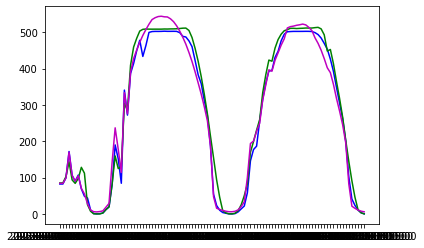

In [22]:
plt.plot(stj['time'][-100:], predicted[-100:], 'b')
plt.plot(stj['time'][-100:], actual[-100:], 'g')
plt.plot(stj['time'][-100:], stj['DC_pred'][-100:], 'm')

In [18]:
stj['time'][:100]

0     2019-12-01 06:45:00
1     2019-12-01 07:00:00
2     2019-12-01 07:15:00
3     2019-12-01 07:30:00
4     2019-12-01 07:45:00
             ...         
95    2019-12-03 12:30:00
96    2019-12-03 12:45:00
97    2019-12-03 13:00:00
98    2019-12-03 13:15:00
99    2019-12-03 13:30:00
Name: time, Length: 100, dtype: object

In [2]:
stj.head()

NameError: name 'stj' is not defined